Μάθημα: **Μηχανική Μάθηση** - Χειμερινό Εξάμηνο 2022-2023

2η Σειρά Αναλυτικών Ασκήσεων - Ονοματεπώνυμο: Ειρήνη Δόντη - Α.Μ: 03119839

ΑΣΚΗΣΗ 2.2

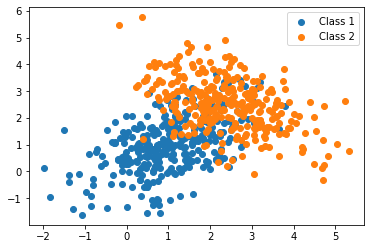

In [113]:
#2b
import numpy as np
import matplotlib.pyplot as plt

# mean and covariance matrices for the two classes
m1 = np.array([1, 1])
s1 = np.array([[1, 0.5], [0.5, 1]])
m2 = np.array([2.5, 2.5])
s2 = np.array([[1, -0.4], [-0.4, 1]])
# dataset of 300 points from each class
class1 = np.random.multivariate_normal(m1, s1, 300)
class2 = np.random.multivariate_normal(m2, s2, 300)
# plot data
plt.scatter(class1[:, 0], class1[:, 1], label="Class 1")
plt.scatter(class2[:, 0], class2[:, 1], label="Class 2")
plt.legend()
plt.show()

Αυτό θα δημιουργήσει ένα διάγραμμα διασποράς με δύο συστάδες σημείων, το ένα κεντραρισμένο γύρω από το μέσο όρο [1, 1] και το άλλο κεντραρισμένο γύρω από το μέσο όρο [2,5, 2,5].

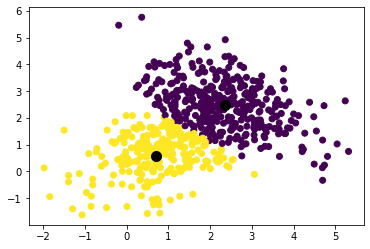

In [114]:
#2c
import numpy as np

def kmeans(X, k, epsilon=1e-4):
    centr = X[np.random.choice(X.shape[0], k, replace=False)]   # centroids randomly
    prev_centr = centr.copy()
    clusters = np.zeros(X.shape[0])
    flag = False
    while not flag:
        for i, x in enumerate(X): # points to nearest centroid
            distances = np.linalg.norm(x - centr, axis=1)
            clusters[i] = np.argmin(distances)
        for j in range(k):        # centroids to mean of points in each cluster
            centr[j] = np.mean(X[clusters == j], axis=0)
        # check convergence
        if np.linalg.norm(centr - prev_centr) < epsilon:
            flag = True
        prev_centr = centr.copy()
    return centr, clusters

X = np.concatenate((class1, class2)) # concatenate data from two classes

centr, clusters = kmeans(X, k=2, epsilon=1e-4) # k-means algorithm

# results
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centr[:, 0], centr[:, 1], c='black', marker='o', s=100)
plt.show()


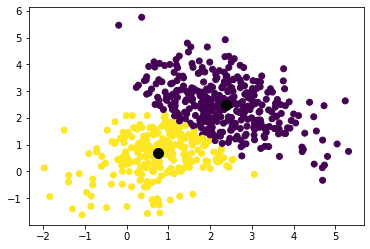

In [115]:
#2d
import numpy as np

def fuzzy_c_means(X, k, q=2, epsilon=1e-4):
    # random centroids
    centr = np.random.rand(k, X.shape[1]) 
    prev_centr = np.zeros_like(centr)
    #U with random values
    U = np.random.rand(X.shape[0], k)
    # normalization
    U = U / U.sum(axis=1)[:, np.newaxis]
    flag = False
    while not flag:
        # Update centroids
        for j in range(k):
            np.copyto(prev_centr[j],centr[j])
            num = np.sum((U[:,j]**q)[:,np.newaxis]*X, axis=0)
            den = np.sum(U[:, j]**q)
            centr[j] = num / den
        # Update membership matrix
        for i, x in enumerate(X):
            for j in range(k):
                U[i, j] = 1 / np.sum(np.linalg.norm(x - centr[j])**2 / np.linalg.norm(x - centr, axis=1)**2)
        # check convergence
        if np.linalg.norm(prev_centr - centr) < epsilon:
            flag = True
    # Assign points to cluster with maximum membership
    clusters = np.argmax(U, axis=1)
    return centr, clusters

# Run the fuzzy c-means algorithm
cent, clust = fuzzy_c_means(X, k=2, q=2, epsilon=1e-4)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clust)
plt.scatter(cent[:, 0], cent[:, 1], c='black', marker='o', s=100)
plt.show()



2ε.
Συγκρίνουμε τους αλγόριθμους k-means και fuzzy c-means ως προς i) τον αριθμό των επαναλήψεων που απαιτούνται μέχρι τον τερματισμό τους, ii) τη μέση απόσταση των εκτιμώμενων κέντρων από τα πραγματικά κέντρα και iii) το ποσοστό επιτυχίας:

i) Ο αριθμός των επαναλήψεων εξαρτάται από τη σύγκλιση του εκάστοτε αλγορίθμου. Η σύγκλιση εξαρτάται από τον αριθμό των συστάδων τις αρχικές θέσεις και το σύνολο δεδομένων. Ο αλγόριθμος k-means συγκλίνει ταχύτερα από τον αλγόριθμο fuzzy c-means, καθώς ο δεύτερος απαιτεί περισσότερους υπολογισμούς για την ενημέρωση των πινάκων.

ii) O αλγόριθμος k-means παρέχει πιο ακριβή εκτίμηση των εκτιμόμενων κέντρων, καθώς ελαχιστοποιεί το άθροισμα των αποστάσεων μεταξύ των σημείων δεδομένων και των εκτιμόμενων κέντρων. Από την άλλη πλευρά, ο ασαφής αλγόριθμος c-means τείνει να παρέχει μια λιγότερο ακριβή εκτίμηση των εκτιμόμενων κέντρων, καθώς χρησιμοποιεί σταθμισμένο άθροισμα αποστάσεων.

iii) Το ποσοστό επιτυχίας των αλγορίθμων είναι το ποσοστό των σημείων δεδομένων που έχουν εκχωρηθεί σωστά στις αντίστοιχες συστάδες τους. Το ποσοστό επιτυχίας του αλγορίθμου k-means είναι λίγο υψηλότερο από αυτό του fuzzy c-means αλγορίθμου, καθώς ο τελευταίος τείνει να παράγει περισσότερα fuzzy clusters.

ΑΣΚΗΣΗ 2.5

In [119]:
#5a
import pandas as pd

df = pd.read_csv('PCA_iris_data')

In [120]:
#5b
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df.iloc[:, 0:4]  # feature variables
y = df.iloc[:, 4]    # target variable

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# subtract mean from the data
X_centered = X - np.mean(X, axis=0)

In [121]:
#5c
# covariance matrix
N = X.shape[0] # number of samples
C = (1/N) * np.dot(X_centered.T, X_centered)
C = np.cov(X, rowvar=False)
print(C)

[[ 0.68656811 -0.0372787   1.27036233  0.51534691]
 [-0.0372787   0.18792128 -0.31673091 -0.11574868]
 [ 1.27036233 -0.31673091  3.09637221  1.28912434]
 [ 0.51534691 -0.11574868  1.28912434  0.57956557]]


In [122]:
#5d
#U and V are eigenvectors
U, S, V = np.linalg.svd(C)
print("Eigenvectors = ",U)
eigenvalues = S ** 2
print("Eigenvalues =",eigenvalues)

Eigenvectors =  [[-0.36263433 -0.6558202   0.58115529  0.3172613 ]
 [ 0.08122848 -0.73001455 -0.59619427 -0.32408808]
 [-0.85629752  0.17703033 -0.07265649 -0.47972477]
 [-0.35868209  0.07509244 -0.54911925  0.75111672]]
Eigenvalues = [1.76768706e+01 5.91198768e-02 6.24910418e-03 5.68490585e-04]


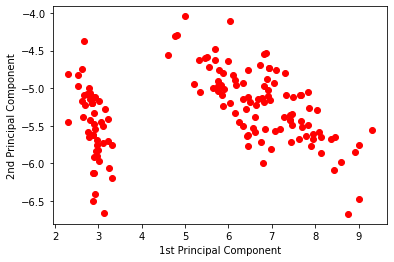

In [123]:
#5e
import matplotlib.pyplot as plt

eigenvalues, eigenvectors = np.linalg.eig(C)
id = eigenvalues.argsort()[::-1] # decreasing eigenvalues
eigenvectors = eigenvectors[:,id]
pc1, pc2 = eigenvectors[:, 0], eigenvectors[:, 1] # first 2 principal components
#projecting data for first 2 principal components
project = np.dot(X, np.vstack((pc1, pc2)).T)
plt.scatter(project[:, 0], project[:, 1], color = 'r')
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.show()



In [124]:
#5st
eigenvalues, eigenvectors = np.linalg.eig(C)
perc = eigenvalues / np.sum(eigenvalues) # for each component calculate perc
perc = perc[np.argsort(perc)[::-1]] # sort perc in descending order
sum_perc = np.sum(perc) # add perc
# find the number of components needed to reach 95% of perc
components_needed = np.where(sum_perc >= 0.95)[0][0]
id = eigenvalues.argsort()[::-1] # decreasing eigenvalues
eigenvectors = eigenvectors[:,id]
# select first n components
n_components = 1 + components_needed
principal_components = eigenvectors[:, :n_components]

print("Minimum number of principal components =", len(principal_components))

Minimum number of principal components = 4
